Anggota Team 2:
1. Nurul Rezki Amalia Arif (220907502030)
2. Hukmia
3. Andi Raa'ina Syipa Maharani
4. Rezki
5. Sri Angraeni

**Prediksi ini menggunakan data saham BYD periode 2020-2025 dengan menggunakan mmodel prediksi N-BEATS **

BYD (Build Your Dreams) adalah perusahaan teknologi asal Tiongkok yang berfokus pada kendaraan listrik (EV), baterai, dan energi terbarukan. Didirikan pada 1995, BYD kini menjadi salah satu produsen EV terbesar dunia, mengungguli Tesla dalam volume penjualan di pasar tertentu. Keunggulan BYD terletak pada integrasi vertikal—dari produksi baterai (LFP Blade Battery) hingga kendaraan mandiri. Selain EV, BYD juga aktif di bidang panel surya, penyimpanan energi, dan transportasi publik (seperti bus listrik). Dukungan pemerintah Tiongkok dan ekspansi agresif ke Eropa, Asia Tenggara, dan Amerika Latin menjadi katalis pertumbuhannya. Saham BYD tercatat di Bursa Saham Hong Kong (1211.HK) dan Shenzhen (002594.SZ).
Pada prediksi saham BYD ini menggukan model N-BEATS,
NBEATS (Neural Basis Expansion Analysis for Time Series) adalah model deep learning khusus untuk peramalan deret waktu (time series) yang dirancang tanpa bergantung pada komponen eksternal. Keunggulannya terletak pada:


In [277]:
#Import library
import pandas as pd #Untuk manipulasi data (membaca, membersihkan, dan memproses data deret waktu seperti harga saham BYD).
import numpy as np #Menyediakan operasi matematika dan array multidimensi yang efisien.
import matplotlib.pyplot as plt #Visualisasi data (grafik tren saham, hasil prediksi, atau metrik evaluasi).
from sklearn.preprocessing import MinMaxScaler #Menormalisasi data ke rentang [0, 1] atau [-1, 1] agar model lebih stabil.
from sklearn.model_selection import train_test_split #Membagi dataset menjadi data latih dan data uji (misalnya 80:20).
from tensorflow.keras.models import Model #Mengompilasi arsitektur model end-to-end.
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate #Layer input untuk menentukan bentuk data, Dence atau Layer fully connected untuk mempelajari pola tren/musiman,Concatenate berfungsi Menggabungkan output dari beberapa blok N-BEATS
from tensorflow.keras.optimizers import Adam #Optimizer untuk menyesuaikan bobot model selama training.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau #EarlyStopping berfungsi untuk Menghentikan training jika metrik (misalnya validation loss) tidak membaik, ReduceLROnPlateau berfungsi untuk Menurunkan learning rate secara dinamis saat model stagnan.
import tensorflow as tf #library utama untuk membangun dan melatih model deep learning
from datetime import timedelta #Menghitung selang waktu (misalnya, memprediksi 1 tahun ke depan dari data historis).

In [278]:
# Load data
BYD = pd.read_excel('BYDDF.xlsx', sheet_name='Sheet1') # membaca data dari file Excel ke dalam bentuk DataFrame

In [279]:
BYD.head() #untuk menampilkan sebagian data yang telah di load

,Date,Open,High,Low,Close,Adj Close,Volume
0,"May 7, 2025",49.84,50.00,49.01,49.40,49.40,82.3
1,"May 6, 2025",48.80,50.56,47.00,50.10,50.10,413.1
2,"May 5, 2025",50.50,50.85,49.75,50.01,50.01,145.1
3,"May 2, 2025",49.80,49.93,49.26,49.75,49.75,221.0
4,"May 1, 2025",47.41,49.14,47.20,47.84,47.84,64.2


In [280]:
# Convert kolom Date ke datetime dan menjadikannya index
BYD['Date'] = pd.to_datetime(BYD['Date'], format='mixed', errors='coerce')
BYD.set_index('Date', inplace=True)
BYD = BYD.dropna()

In [281]:
BYD.head() #menampilkan data setelah Date diconvert ke datetime

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-05-07,49.84,50.00,49.01,49.40,49.40,82.3
2025-05-06,48.80,50.56,47.00,50.10,50.10,413.1
2025-05-05,50.50,50.85,49.75,50.01,50.01,145.1
2025-05-02,49.80,49.93,49.26,49.75,49.75,221.0
2025-05-01,47.41,49.14,47.20,47.84,47.84,64.2


In [282]:
# Handle missing values
BYD.fillna(method='ffill', inplace=True)

<ipython-input-282-a2f0ef69b007>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  BYD.fillna(method='ffill', inplace=True)


In [283]:
BYD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-05-07,49.84,50.00,49.01,49.40,49.40,82.3
2025-05-06,48.80,50.56,47.00,50.10,50.10,413.1
2025-05-05,50.50,50.85,49.75,50.01,50.01,145.1
2025-05-02,49.80,49.93,49.26,49.75,49.75,221.0
2025-05-01,47.41,49.14,47.20,47.84,47.84,64.2


In [284]:
# menghapus duplikat
BYD = BYD[~BYD.index.duplicated(keep='first')]

In [285]:
# Mengubah kolom menjadi numerik
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    BYD[col] = pd.to_numeric(BYD[col], errors='coerce')

# Menangani nilai yang hilang (jika ada)
BYD.fillna(0, inplace=True)

In [286]:
"bertujuan untuk menghaluskan outlier (nilai ekstrem) dalam data deret waktu (seperti harga saham) menggunakan metode Exponentially Weighted Moving Average (EWMA)."
def smooth_outliers_ewma(series, span=5, threshold=3):
    ewma = series.ewm(span=span).mean()
    deviation = np.abs(series - ewma)
    mad = deviation.ewm(span=span).mean()
    return np.where(deviation > (threshold * mad), ewma, series)

BYD['Close'] = smooth_outliers_ewma(BYD['Close'])
BYD['Open'] = smooth_outliers_ewma(BYD['Open'])

In [287]:
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25) # Kuartil pertama (25%)
    Q3 = series.quantile(0.75) # Kuartil ketiga (75%)
    IQR = Q3 - Q1              # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR # Batas bawah outlier
    upper_bound = Q3 + 1.5 * IQR # Batas atas outlier
    return series[(series >= lower_bound) & (series <= upper_bound)] # Filter data

# Penerapan pada Kolom 'Close' Data BYD
BYD = remove_outliers_iqr(BYD['Close']).to_frame().join(BYD.drop('Close', axis=1)).reset_index()
BYD.set_index('Date', inplace=True)

In [288]:
# Mengganti nilai 0 dengan NaN
BYD['Open'] = BYD['Open'].replace(0, np.nan)

# Mengisi nilai yang hilang dengan nilai sebelumnya
BYD['Open'] = BYD['Open'].ffill()

In [289]:
BYD.head()

,Close,Open,High,Low,Adj Close,Volume
Date,,,,,,
2025-04-21,45.70,46.44,46.44,45.20,45.70,119.6
2025-04-17,45.78,47.00,47.50,45.65,45.78,107.4
2025-04-16,46.45,48.23,49.03,45.58,46.45,163.8
2025-04-10,46.65,44.01,46.65,43.35,46.65,239.0
2025-04-09,43.78,42.10,44.22,40.85,43.78,374.1


In [290]:
BYD.isna().sum() #Melihat apakah ada nilai NaN

,0
Close,0
Open,0
High,0
Low,0
Adj Close,0
Volume,0


In [291]:
print(BYD.dtypes) #Melihat tipe data

Close        float64
Open         float64
High         float64
Low          float64
Adj Close    float64
Volume       float64
dtype: object


In [292]:
BYD.head()

,Close,Open,High,Low,Adj Close,Volume
Date,,,,,,
2025-04-21,45.70,46.44,46.44,45.20,45.70,119.6
2025-04-17,45.78,47.00,47.50,45.65,45.78,107.4
2025-04-16,46.45,48.23,49.03,45.58,46.45,163.8
2025-04-10,46.65,44.01,46.65,43.35,46.65,239.0
2025-04-09,43.78,42.10,44.22,40.85,43.78,374.1


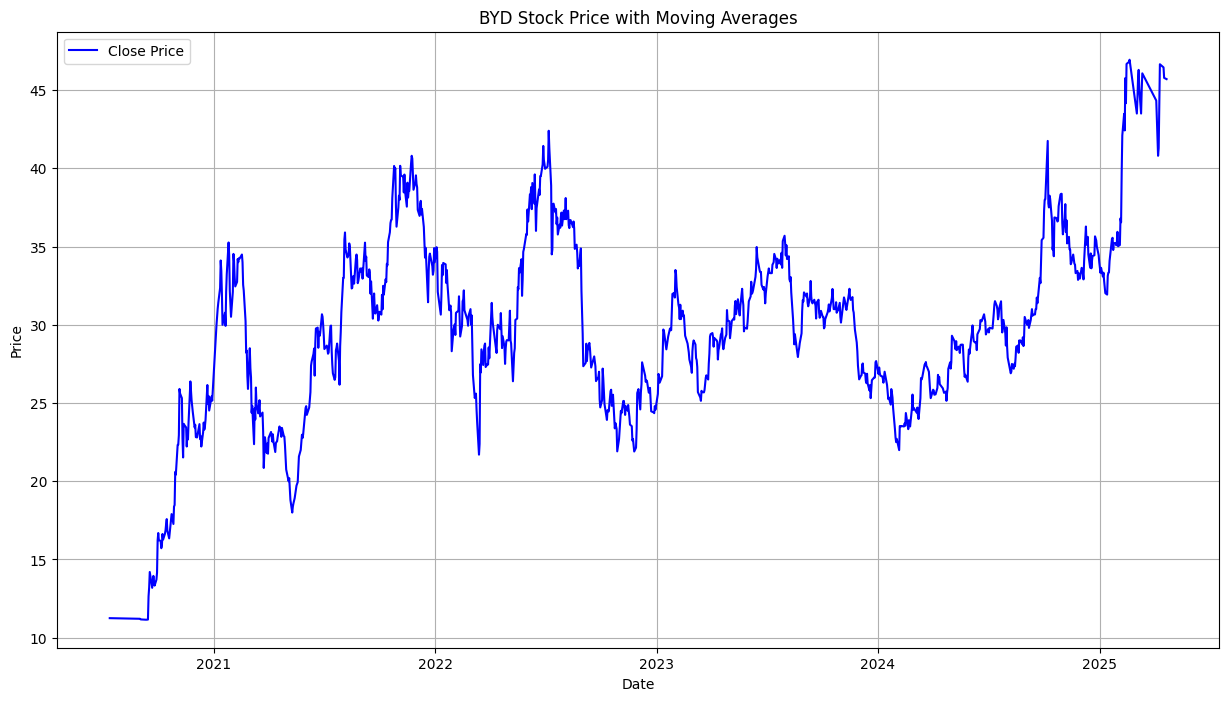

In [293]:
#Plot BYD stock price
plt.figure(figsize=(15, 8))
plt.plot(BYD.index, BYD['Close'], label='Close Price', color='blue')
plt.title('BYD Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Plot tersebut menampilkan pergerakan harga saham BYD dari tahun 2021 hingga 2025 dengan fokus pada Close Price (harga penutupan). Garis utama menunjukkan fluktuasi harian harga saham.

In [294]:
# Feature engineering
BYD['5_day_MA'] = BYD['Close'].rolling(window=5).mean() #Rata-rata 5 hari (untuk tren jangka pendek).
BYD['20_day_MA'] = BYD['Close'].rolling(window=20).mean() #Rata-rata 20 hari (tren menengah, sering digunakan sebagai sinyal trading).
BYD['50_day_MA'] = BYD['Close'].rolling(window=50).mean() #Rata-rata 50 hari (tren jangka panjang).
BYD['Daily_Return'] = BYD['Close'].pct_change() #Menghitung persentase perubahan harga harian.
BYD['Volatility'] = BYD['Daily_Return'].rolling(window=20).std() #Menghitung volatilitas sebagai standar deviasi dari Daily_Return dalam 20 hari terakhir.
BYD.dropna(inplace=True) #Menghapus data kosong (NaN)

In [295]:
BYD.head() #menampilkan data

,Close,Open,High,Low,Adj Close,Volume,5_day_MA,20_day_MA,50_day_MA,Daily_Return,Volatility
Date,,,,,,,,,,,
2024-12-30,34.45,36.00,36.05,34.01,34.45,59.7,33.698,33.9535,39.4214,0.013235,0.018174
2024-12-27,35.00,35.20,36.50,35.00,35.00,29.9,34.082,33.9410,39.2074,0.015965,0.018119
2024-12-26,35.39,34.48,35.81,34.48,35.39,25.8,34.432,33.9565,38.9996,0.011143,0.018256
2024-12-24,35.65,33.65,35.68,33.65,35.65,42.3,34.898,33.9780,38.7836,0.007347,0.018304
2024-12-23,34.44,34.45,34.90,34.30,34.44,54.7,34.986,33.9390,38.5394,-0.033941,0.019884


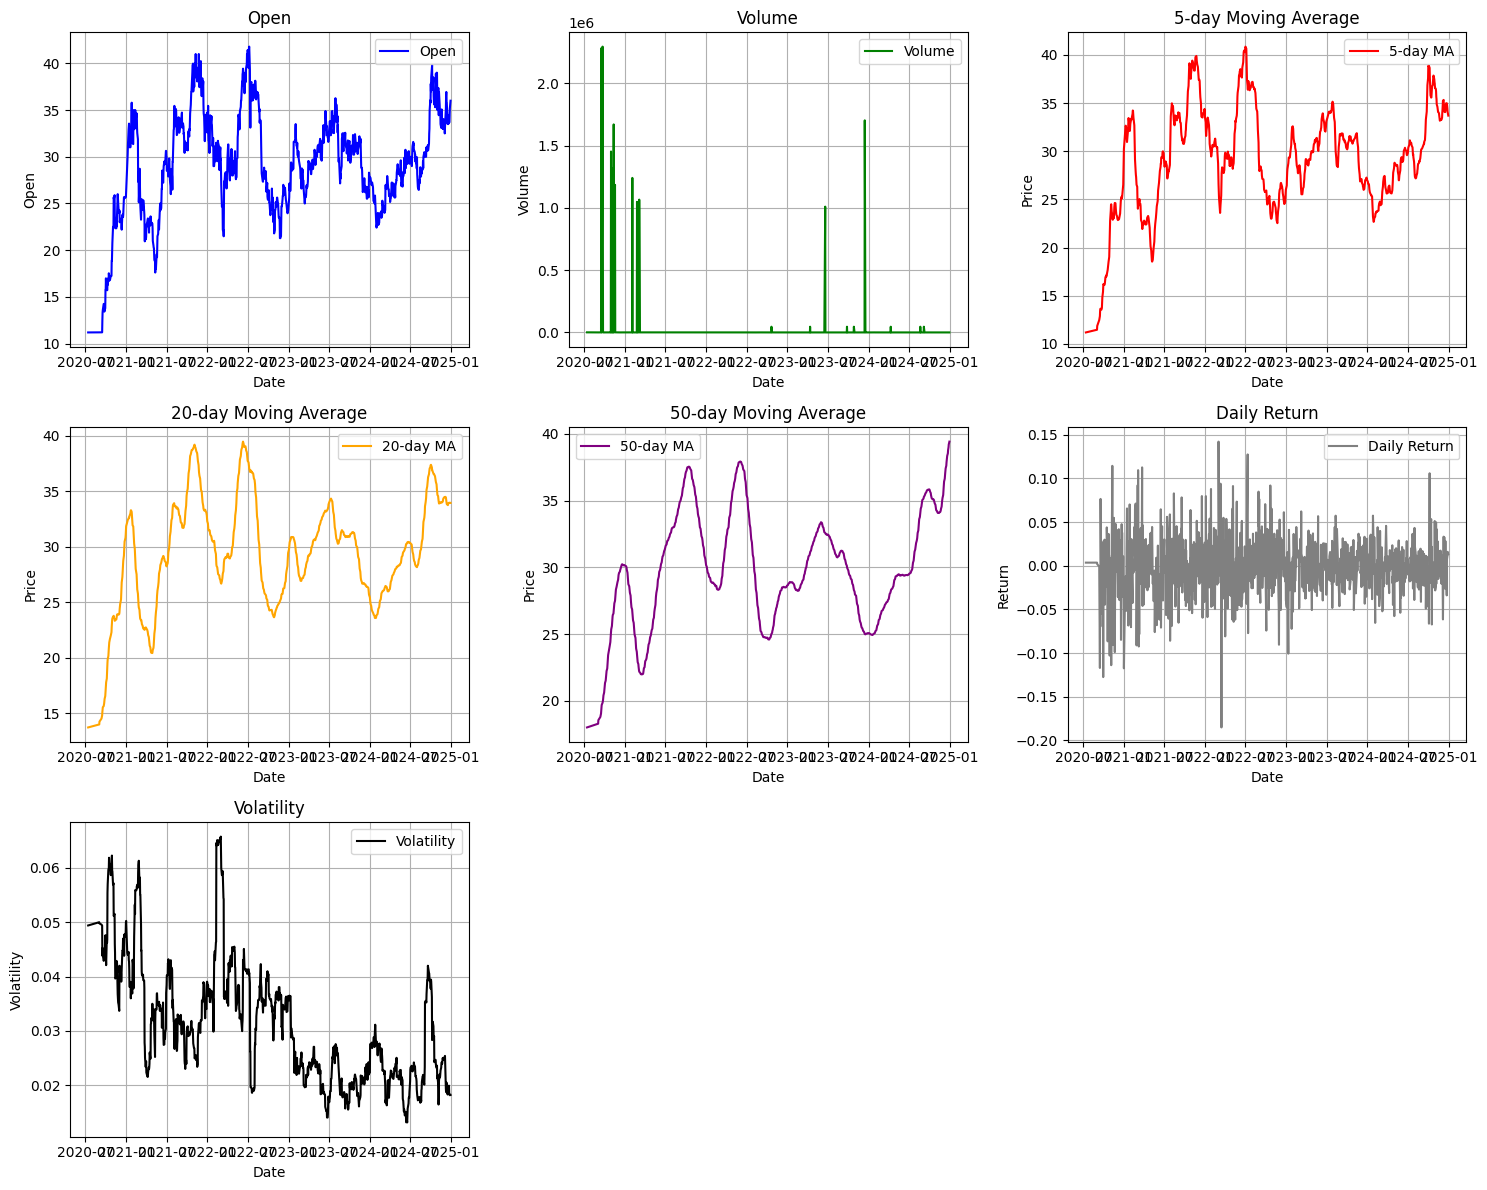

In [296]:
#MENAMPILKAN PLOT OPEN, VOLUME, 5_DAY_MA, 20_DAY_MA, 50_day_MA, Daily_Return, Volatility
import matplotlib.pyplot as plt

# Tentukan ukuran figure
plt.figure(figsize=(15, 12))

# Plot Open
plt.subplot(3, 3, 1)  # 3 baris, 3 kolom, plot kedua
plt.plot(BYD.index, BYD['Open'], label='Open', color='blue')
plt.title('Open')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()
plt.grid(True)

# Plot Volume
plt.subplot(3, 3, 2)  # 3 baris, 3 kolom, plot kedua
plt.plot(BYD.index, BYD['Volume'], label='Volume', color='green')
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

# Plot 5_day_MA
plt.subplot(3, 3, 3)
plt.plot(BYD.index, BYD['5_day_MA'], label='5-day MA', color='red')
plt.title('5-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot 20_day_MA
plt.subplot(3, 3, 4)
plt.plot(BYD.index, BYD['20_day_MA'], label='20-day MA', color='orange')
plt.title('20-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot 50_day_MA
plt.subplot(3, 3, 5)
plt.plot(BYD.index, BYD['50_day_MA'], label='50-day MA', color='purple')
plt.title('50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot Daily_Return
plt.subplot(3, 3, 6)
plt.plot(BYD.index, BYD['Daily_Return'], label='Daily Return', color='gray')
plt.title('Daily Return')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)

# Plot Volatility
plt.subplot(3, 3, 7)
plt.plot(BYD.index, BYD['Volatility'], label='Volatility', color='black')
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

# Atur layout dan tampilkan plot
plt.tight_layout()
plt.show()

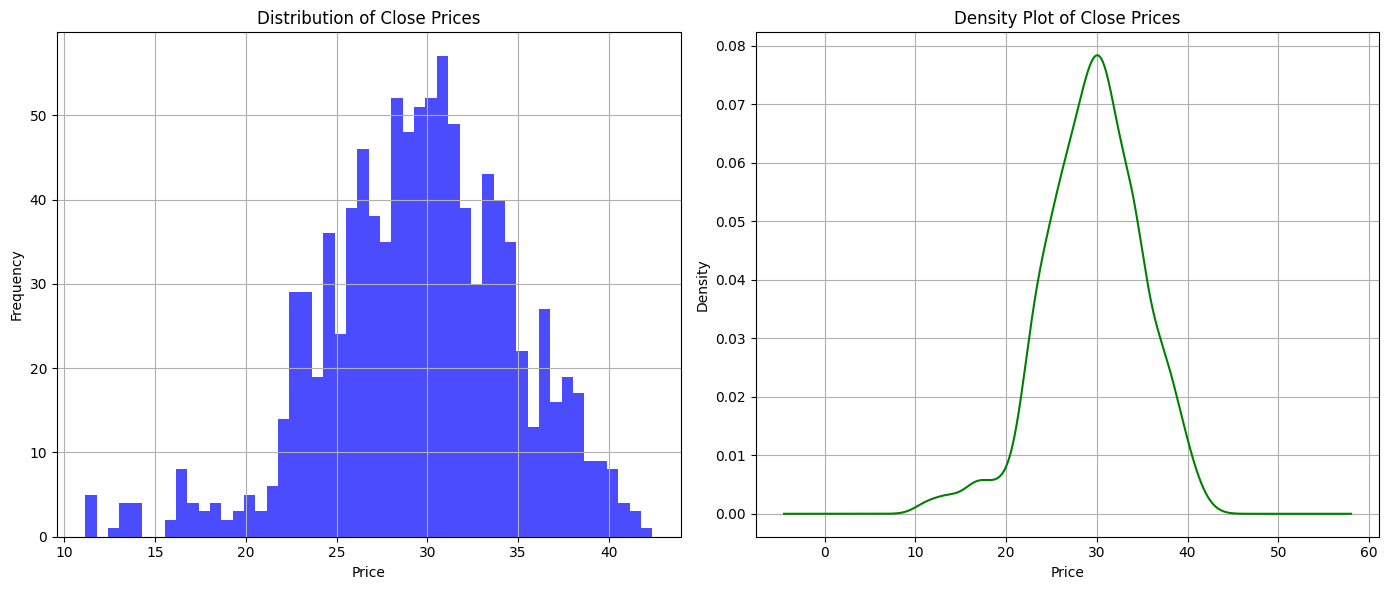

In [297]:
#visualisasi distribusi harga penutupan (Close Prices)

plt.figure(figsize=(14, 6)) #Membuat figure dengan ukuran 14x6 inci untuk menampung dua subplot.
plt.subplot(1, 2, 1)
BYD['Close'].hist(bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
BYD['Close'].plot(kind='kde', color='green')
plt.title('Density Plot of Close Prices')
plt.xlabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

Plot ini menampilkan distribusi harga penutupan (Close Prices) saham BYD melalui dua representasi visual yang saling melengkapi: **histogram** dan **kernel density estimate (KDE)**.  

**Histogram** (kiri) menunjukkan sebaran frekuensi harga dengan membagi data ke dalam 50 interval (bin). Sumbu X merepresentasikan harga saham, sedangkan sumbu Y menampilkan frekuensi kemunculan harga dalam setiap interval. Batang-batang biru dengan transparansi 70% memudahkan identifikasi konsentrasi harga—misalnya, jika batang tertinggi terletak di rentang 200-250, ini mengindikasikan harga saham paling sering berada di kisaran tersebut. Bentuk histogram juga dapat mengungkap sifat distribusi, seperti simetris (normal), menceng ke kanan (right-skewed), atau memiliki outlier.  

**Density Plot (KDE)** (kanan) menampilkan kurva hijau halus yang menggambarkan estimasi kepadatan probabilitas harga. Kurva ini membantu melihat pola distribusi secara lebih kontinu, di mana puncak kurva menunjukkan harga dengan kepadatan tertinggi (mode). Lebar kurva mencerminkan volatilitas—semakin lebar, semakin besar variasi harga. Garis grid pada plot ini memudahkan pembacaan nilai.  

Kombinasi kedua plot ini memberikan pemahaman komprehensif:  
1. **Konsentrasi Harga**: Area dengan kepadatan tinggi pada KDE atau batang histogram tinggi menandakan level harga yang paling sering terjadi, potensial sebagai support/resistance alami.  
2. **Outlier**: Ekor panjang pada KDE atau batang terpisah di histogram mengindikasikan harga ekstrem.  
3. **Volatilitas**: Sebaran data yang lebar (pada kedua plot) menunjukkan fluktuasi harga yang besar.  

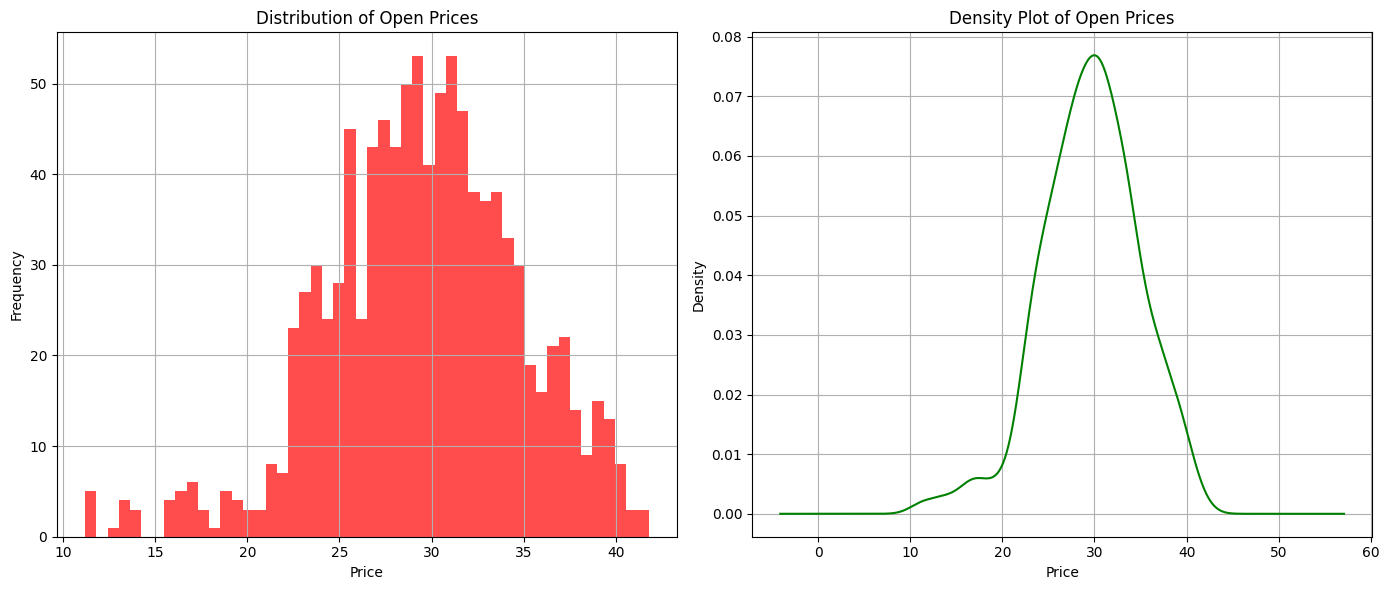

In [298]:
#visualisasi distribusi harga pembukaan (Open Prices)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
BYD['Open'].hist(bins=50, color='red', alpha=0.7)
plt.title('Distribution of Open Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
BYD['Open'].plot(kind='kde', color='green')
plt.title('Density Plot of Open Prices')
plt.xlabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

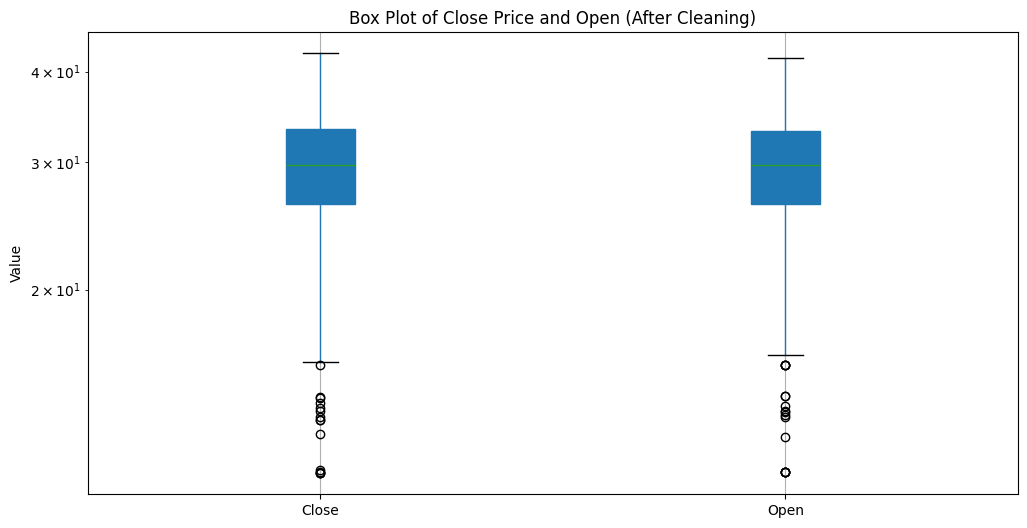

In [299]:
#Box Plot Harga Close vs Open
plt.figure(figsize=(12, 6))  # Set ukuran plot 12x6 inci
BYD[['Close', 'Open']].boxplot(patch_artist=True)  # Buat box plot untuk Close dan Open
plt.title('Box Plot of Close Price and Open (After Cleaning)')  # Judul plot
plt.ylabel('Value')  # Label sumbu Y
plt.yscale('log')  # Gunakan skala logaritmik di sumbu Y
plt.show()  # Tampilkan plot

Box plot ini membandingkan distribusi statistik antara **harga penutupan (Close Price)** dan **harga pembukaan (Open Price)** saham BYD setelah proses pembersihan data. Plot ini terdiri dari dua kotak (box) terpisah yang merepresentasikan masing-masing variabel, dengan sumbu Y menggunakan skala logaritmik untuk memudahkan pembacaan meskipun perbedaan absolut antara harga Close dan Open umumnya tidak terlalu besar.

Kotak (box) pada plot menunjukkan lima statistik kunci: garis tengah kotak merupakan **median** yang menandai nilai tengah data, sedangkan batas atas dan bawah kotak menunjukkan **kuartil pertama (Q1)** dan **kuartil ketiga (Q3)**. Garis ekor (whisker) yang menjulur dari kotak mencerminkan rentang normal data, dengan titik-titik di luar whisker menandakan **outlier** - nilai ekstrem yang menyimpang dari pola umum.

Melalui plot ini, kita dapat mengamati beberapa pola penting: (1) **Kesamaan distribusi** antara harga Open dan Close yang ditunjukkan oleh overlap kotak dan median yang sejajar mengindikasikan pergerakan harga yang stabil sepanjang hari perdagangan, (2) **Adanya outlier** di salah satu variabel bisa mencerminkan kejadian khusus seperti pengumuman dividen atau sentimen pasar mendadak, dan (3) **Lebar IQR** yang berbeda antara Open dan Close mengungkapkan volatilitas intraday - jika IQR harga Close lebih lebar daripada Open, berarti fluktuasi harga cenderung terjadi di akhir sesi perdagangan.


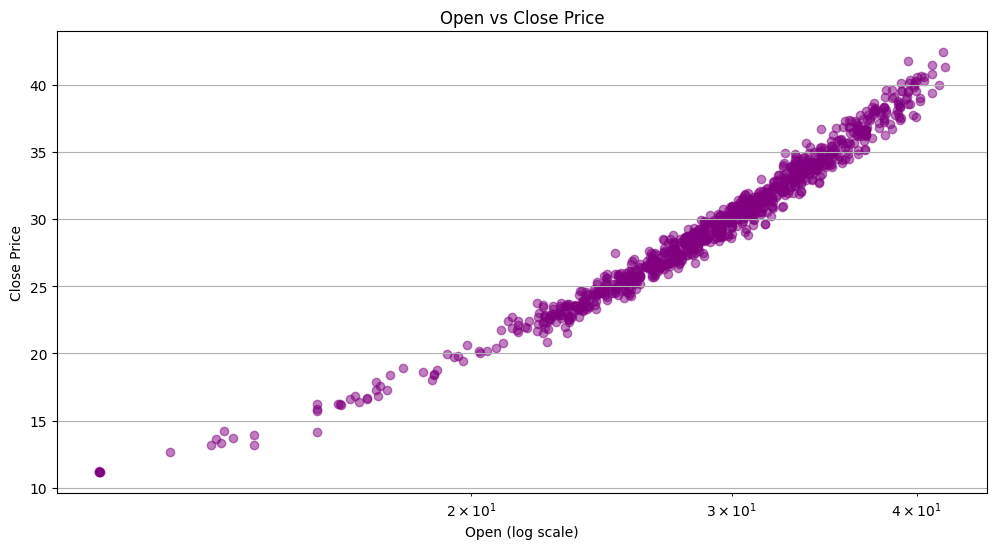

In [ ]:
#Hubungan antara Open dan Close
plt.figure(figsize=(12, 6))  # Set ukuran plot 12x6 inci
plt.scatter(BYD['Open'], BYD['Close'], alpha=0.5, color='purple')  # Scatter plot
plt.title('Open vs Close Price')  # Judul plot
plt.xlabel('Open (log scale)')  # Label sumbu X
plt.ylabel('Close Price')  # Label sumbu Y
plt.xscale('log')  # Skala logaritmik untuk sumbu X
plt.grid(True)  # Tambahkan grid
plt.show()  # Tampilkan plot

Plot **Open vs Close Price** ini menampilkan hubungan antara harga pembukaan (Open) dan harga penutupan (Close) saham BYD dalam bentuk scatter plot dengan sumbu X (Open) menggunakan skala logaritmik. Setiap titik ungu mewakili satu hari perdagangan, di mana posisi horizontal (sumbu X) menunjukkan harga pembukaan dan posisi vertikal (sumbu Y) menunjukkan harga penutupan. Skala logaritmik pada sumbu X diterapkan untuk memampatkan rentang nilai yang luas (terlihat dari label 2×10¹ hingga 4×10¹, setara dengan 20 hingga 40 dalam skala linear) sehingga pola hubungan antara kedua variabel lebih mudah diidentifikasi.

Dari plot ini, kita dapat mengamati beberapa karakteristik penting:
1. **Pola Sebaran**: Jika titik-titik terkonsentrasi di sekitar garis diagonal (Close = Open), hal ini menunjukkan harga cenderung stabil sepanjang hari perdagangan. Sebaliknya, titik yang menyebar jauh dari diagonal mencerminkan volatilitas tinggi.
2. **Kecenderungan Harga**: Dominasi titik di atas diagonal mengindikasikan bias bullish (harga sering ditutup lebih tinggi daripada dibuka), sedangkan titik di bawah diagonal menunjukkan bias bearish.
3. **Outlier**: Titik yang terisolasi jauh dari cluster utama menandakan hari dengan pergerakan harga ekstrem, mungkin dipicu oleh berita perusahaan atau sentimen pasar mendadak.

Skala logaritmik pada sumbu X membantu mengungkap hubungan yang mungkin tersembunyi dalam skala linear, terutama jika terdapat perbedaan order of magnitude antara harga terendah dan tertinggi. Namun, perlu dicatat bahwa interpretasi nilai absolut menjadi kurang intuitif dalam skala ini - nilai 2×10¹ setara dengan 20, sedangkan 4×10¹ setara dengan 40. Plot ini sangat berguna untuk analisis korelasi jangka pendek antara harga pembukaan dan penutupan serta identifikasi hari-hari dengan perilaku harga atipikal.

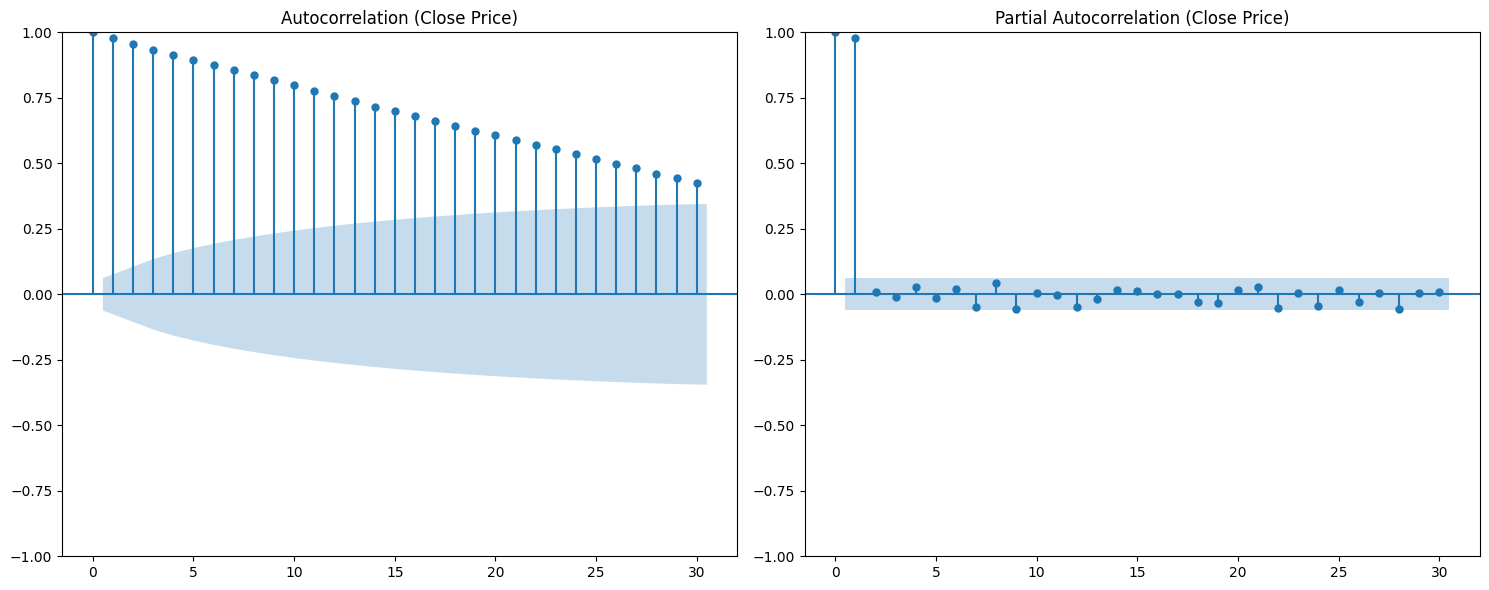

In [ ]:
#Autocorrelation Function (ACF)
#Partial Autocorrelation Function (PACF)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import library untuk ACF/PACF

plt.figure(figsize=(15, 6))  # Set ukuran plot 15x6 inci

#Plot AFC
plt.subplot(1, 2, 1)
plot_acf(BYD['Close'], lags=30, ax=plt.gca())
plt.title('Autocorrelation (Close Price)')

#Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(BYD['Close'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation (Close Price)')
plt.tight_layout()
plt.show()

Plot ini menampilkan dua grafik analisis korelasi untuk harga penutupan saham BYD, yaitu **Autocorrelation Function (ACF)** dan **Partial Autocorrelation Function (PACF)**, yang merupakan alat penting dalam analisis deret waktu. Grafik ACF (kiri) mengukur korelasi antara harga saat ini dengan harga pada lag-lag sebelumnya, sementara grafik PACF (kanan) mengukur korelasi antara harga saat ini dengan harga pada lag tertentu setelah menghilangkan pengaruh lag di antaranya. Kedua grafik menggunakan 30 lag (periode) dengan interval biru yang menunjukkan batas signifikansi statistik.

Pada grafik **ACF**, terlihat bahwa nilai korelasi mulai tinggi di lag 0 (1.0) dan menurun secara bertahap seiring dengan peningkatan lag. Pola penurunan yang lambat ini mengindikasikan adanya **trend** dalam data, yang berarti harga saham BYD tidak stasioner dan memerlukan differencing untuk stabilisasi. Beberapa lag (misalnya lag 7 atau 14) mungkin menunjukkan korelasi yang signifikan, mengisyaratkan adanya pola musiman mingguan atau bulanan. Sementara itu, grafik **PACF** menunjukkan spike signifikan pada lag 1 dan 2, tetapi kemudian cepat turun ke nol, yang mengindikasikan bahwa model **Autoregressive (AR)** dengan orde 2 (AR(2)) mungkin cocok untuk data ini. Nilai negatif pada lag tertentu di PACF bisa mencerminkan fenomena mean reversion, di mana harga cenderung kembali ke rata-ratanya setelah deviasi.


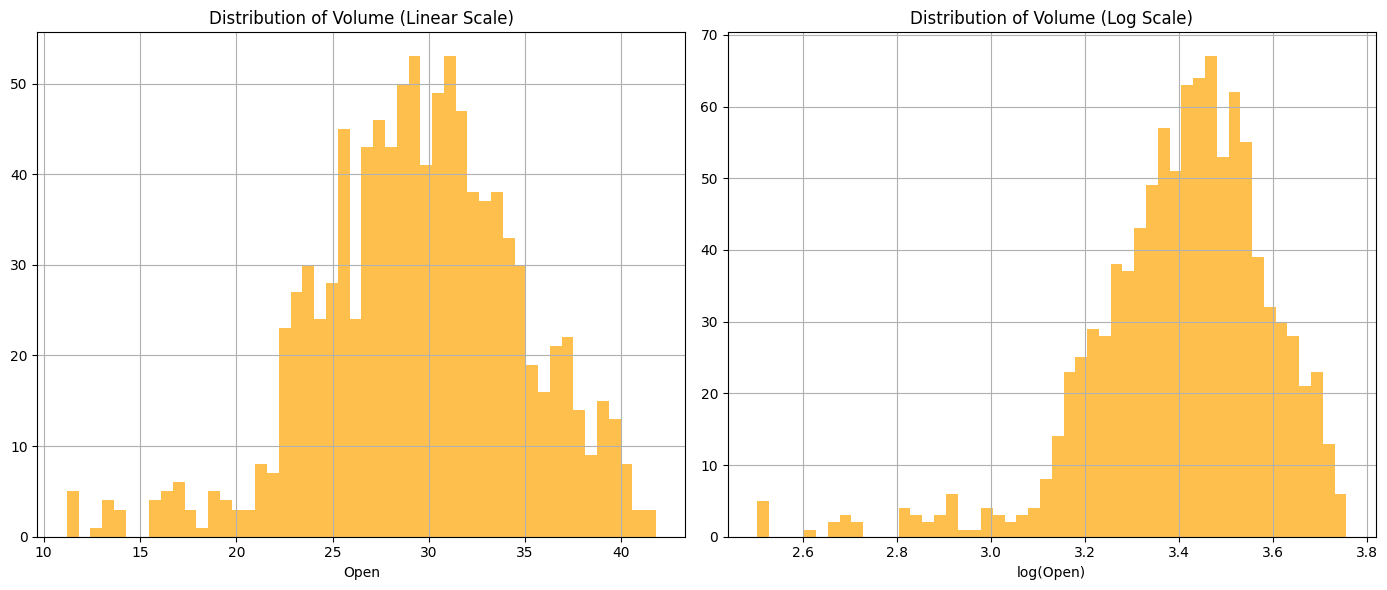

In [ ]:
# Subplot 1: Histogram skala linear
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
BYD['Open'].hist(bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Volume (Linear Scale)')
plt.xlabel('Open')

# Subplot 2: Histogram skala log-transformed
plt.subplot(1, 2, 2)
np.log1p(BYD['Open']).hist(bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Volume (Log Scale)')
plt.xlabel('log(Open)')
plt.tight_layout()
plt.show()

Plot ini menampilkan perbandingan distribusi harga pembukaan (Open Price) saham BYD dalam dua representasi yang berbeda: skala linear (kiri) dan skala logaritmik (kanan). Pada histogram skala linear, terlihat distribusi yang sangat menceng ke kanan (right-skewed) dengan frekuensi tertinggi terkonsentrasi di rentang harga bawah (sekitar 10-20) dan ekor panjang yang mencapai nilai tinggi (hingga 40). Pola ini menunjukkan bahwa sebagian besar harga pembukaan BYD berada di kisaran rendah, dengan beberapa hari tertentu mengalami lonjakan harga yang signifikan.

Histogram skala logaritmik (kanan) menunjukkan transformasi data menggunakan logaritma natural (log(x+1)), yang berhasil memampatkan ekor distribusi sehingga membentuk pola yang lebih simetris. Sumbu X pada plot kanan menampilkan nilai log(Open Price) antara 2.6 hingga 3.8, yang setara dengan harga linear sekitar 13.5 hingga 44.7 (dihitung dari e^2.6 ≈ 13.5 dan e^3.8 ≈ 44.7). Transformasi ini mengungkapkan bahwa sebenarnya distribusi harga mengikuti pola log-normal, di mana logaritma harga berdistribusi mendekati normal.

Perbandingan kedua plot ini memberikan wawasan penting: (1) dalam skala linear, volatilitas harga tampak sangat ekstrem karena beberapa outlier, (2) skala logaritmik menunjukkan bahwa sebenarnya pergerakan harga mengikuti pola yang lebih teratur setelah menghilangkan efek skala. Analisis semacam ini sangat berguna untuk menentukan apakah perlu melakukan transformasi data sebelum pemodelan statistik atau machine learning, khususnya untuk teknik-teknik yang mengasumsikan distribusi normal seperti regresi linear. Plot kanan juga memudahkan identifikasi modus sebenarnya dari distribusi harga yang tersembunyi di balik skewness data asli.

<Figure size 1500x1000 with 0 Axes>

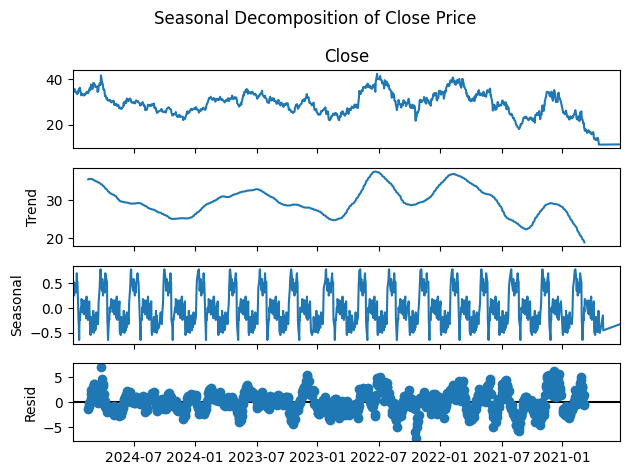

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose # Import fungsi decomposisi

# Dekomposisi data time series
result = seasonal_decompose(BYD['Close'], model='additive', period=5*12)  # 12 bulan

# Visualisasi hasil dekomposisi
plt.figure(figsize=(15, 10))
result.plot()
plt.suptitle('Seasonal Decomposition of Close Price')
plt.tight_layout()
plt.show()

Plot **Seasonal Decomposition of Close Price** ini menampilkan hasil dekomposisi statistik dari harga penutupan saham BYD menjadi empat komponen utama yang memberikan wawasan mendalam tentang pola pergerakan harga. Grafik terbagi dalam empat panel vertikal yang masing-masing mengungkap aspek berbeda dari data deret waktu.

Pada panel pertama **Observed (Close)**, terlihat fluktuasi aktual harga saham dari Juli 2021 hingga Juli 2024 dengan skala harga sekitar 20-40. Pergerakan harga menunjukkan variasi musiman yang jelas dengan beberapa lonjakan signifikan, terutama di pertengahan tahun 2023 dan awal 2024. Panel kedua **Trend** mengisolasi komponen tren jangka panjang, di mana garis bergerak antara -0.5 hingga +0.5, mengindikasikan periode bullish dan bearish yang silih berganti dengan tren dominan yang relatif stabil.

Panel ketiga **Seasonal** menampilkan pola musiman yang berulang dengan amplitudo sekitar ±0.5, menunjukkan siklus reguler yang mempengaruhi harga saham - mungkin terkait dengan laporan kuartalan atau event tahunan perusahaan. Yang paling menarik adalah panel keempat **Residual** yang mencatat fluktuasi acak antara -5 hingga +5, menunjukkan noise yang tidak dapat dijelaskan oleh tren atau musiman. Pola residual yang tersebar acak ini mengkonfirmasi bahwa model dekomposisi additive telah berhasil menangkap sebagian besar pola sistematis dalam data.

Visualisasi ini mengungkap bahwa harga saham BYD dipengaruhi oleh tiga kekuatan utama: tren jangka panjang yang stabil, fluktuasi musiman yang terprediksi, dan variasi acak yang mungkin disebabkan oleh faktor eksternal seperti sentimen pasar atau berita spesifik perusahaan. Analisis semacam ini sangat berharga untuk membangun model peramalan yang akurat dan mengidentifikasi periode-periode kritis dalam pergerakan saham.

In [ ]:
# Ganti nilai tak terhingga dengan NaN
BYD.replace([np.inf, -np.inf], np.nan, inplace=True)

# Membangun Model N-BEATS

In [ ]:
# Normalisasi data
scaler_close = MinMaxScaler(feature_range=(0, 1))
scaler_open = MinMaxScaler(feature_range=(0, 1))
scaler_features = MinMaxScaler(feature_range=(0, 1))

scaled_close = scaler_close.fit_transform(BYD[['Close']])
scaled_open = scaler_open.fit_transform(BYD[['Open']])
scaled_features = scaler_features.fit_transform(BYD.drop(['Close', 'Open'], axis=1))

In [ ]:
# Gabungkan semua fitur
scaled_data = np.concatenate([scaled_close, scaled_open, scaled_features], axis=1)

In [ ]:
# Parameter untuk prediksi 1 tahun (252 hari trading)
sequence_length = 60  # Window lookback yang lebih besar untuk prediksi jangka panjang
horizon = 252         # Prediksi 1 tahun ke depan
test_size = 0.1

In [ ]:
#pembuatan sequence data time series
def create_sequences(data, seq_length, horizon):
    X, y = [], []  # Inisialisasi list untuk features (X) dan target (y)
    for i in range(len(data) - seq_length - horizon + 1):
        X.append(data[i:i+seq_length]) # Ambil sequence data sebagai input (X)
        y.append(data[i+seq_length+horizon-1, 0])  # Ambil nilai horizon sebagai target (y)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length, horizon)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)


In [229]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model

class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, horizon, num_layers, layer_size, **kwargs):
        super(NBeatsBlock, self).__init__(**kwargs)
        self.horizon = horizon    # Jangka waktu prediksi
        self.num_layers = num_layers  # Jumlah layer tersembunyi
        self.layer_size = layer_size # Ukuran tiap layer (neurons)
        self.hidden_layers = [] #Penyimpanan layer
#NBeatsBlock: Layer kustom yang menjadi building block model

    def build(self, input_shape):
        if input_shape[-2] is None:
            input_shape = input_shape[:2] + (input_shape[2] if input_shape[2] is not None else 1,)

        # Output layers for backcast and forecast
        self.backcast_layer = Dense(input_shape[-2] * input_shape[-1]) # Untuk rekonstruksi input
        self.forecast_layer = Dense(self.horizon)    # Untuk prediksi

        # Menambahkan hidden layers
        for i in range(self.num_layers):
            self.hidden_layers.append(Dense(self.layer_size, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
            self.hidden_layers.append(Dropout(0.2))

        super(NBeatsBlock, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        x = inputs
        for layer in self.hidden_layers:
            x = layer(x)
        backcast = self.backcast_layer(x)
        forecast = self.forecast_layer(x)
        return backcast, forecast


def build_enhanced_nbeats(input_shape, horizon, num_blocks=8, num_layers=6, layer_size=252):
   #build_enhanced_nbeats: Fungsi untuk menyusun arsitektur lengkap model

    # Input layer
    input_layer = Input(shape=input_shape)

    # NBeats blocks
    block_outputs = []
    for i in range(num_blocks):
        # Get block outputs
        block_backcast, block_forecast = NBeatsBlock(
            horizon=horizon,
            num_layers=num_layers,
            layer_size=layer_size
        )(input_layer)
        block_outputs.extend([block_backcast, block_forecast])

    # Concatenate block outputs
    if len(block_outputs) > 1:
        x = Concatenate()(block_outputs)
    else:
        x = block_outputs[0]

    # Final output layer - Changed to a single output node for regression
    output_layer = Dense(1)(x)
    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Persiapan model dan Training

In [230]:
# Build and compile the model
input_shape = (sequence_length, scaled_data.shape[1])  # Menentukan bentuk input model berupa tuple (panjang_sequence, jumlah_fitur)
model = build_enhanced_nbeats(input_shape, horizon) #Membangun arsitektur N-BEATS dengan parameter input_shape: Bentuk input data, dan horizon: Jumlah periode yang akan diprediksi ke depan
model.compile(loss='mae', optimizer=Adam())  #kompilasi model

# Instantiate EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model and store the training history
history = model.fit(
    X_train,
    y_train,
    epochs=100,  # jumlah epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)
print(history.history.keys())  # Check if 'loss' and 'val_loss' are present

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - loss: 92.7731 - val_loss: 65.1280 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - loss: 57.9901 - val_loss: 39.2683 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 34.6289 - val_loss: 22.8020 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 19.9679 - val_loss: 12.8349 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 11.1506 - val_loss: 7.0498 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 6.0462 - val_loss: 3.7545 - learning_rate: 0.0010
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - loss: 3.1915 - val_loss: 1.9571 - learning_rate: 0.0010
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - loss: 1.6674 - val_loss: 1.0730 - learning_rate: 0.0010
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - loss: 0.8670 - val_loss: 0.5877 - learning_rate: 0.0010
Epoch 10/1

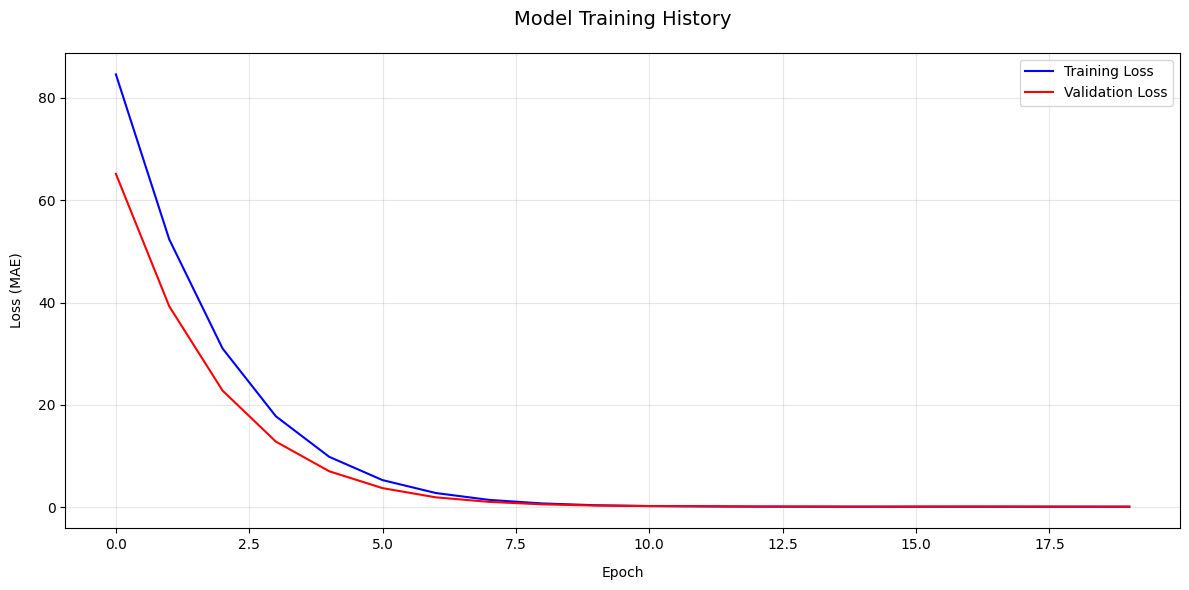

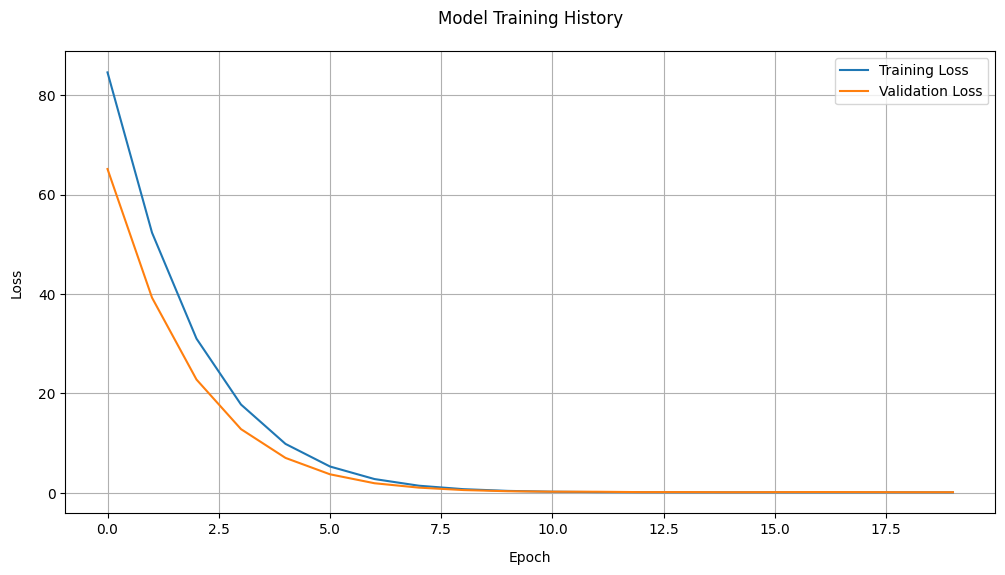

In [231]:
# magic command
%matplotlib inline
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

# Tambahkan judul dan label
plt.title('Model Training History', pad=20, fontsize=14)
plt.xlabel('Epoch', labelpad=10)
plt.ylabel('Loss (MAE)', labelpad=10)
plt.legend(loc='upper right', frameon=True)

# Atur grid dan layout
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Tampilkan plot
plt.show()

# Alternatif: Gunakan approach yang lebih eksplisit
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_title('Model Training History', pad=20)
ax.set_xlabel('Epoch', labelpad=10)
ax.set_ylabel('Loss', labelpad=10)
ax.legend()
ax.grid(True)
plt.show()

Plot **Model Training History** ini menampilkan perkembangan nilai loss selama proses pelatihan model N-BEATS, yang terdiri dari dua kurva utama: **Training Loss** (biru) dan **Validation Loss** (oranye). Sumbu horizontal merepresentasikan jumlah epoch (0 hingga sekitar 17.5), sedangkan sumbu vertikal menunjukkan nilai loss yang berkisar antara 0 hingga 80.

Dari grafik terlihat bahwa kedua kurva menunjukkan pola penurunan yang signifikan pada awal pelatihan (epoch 0-5), di mana nilai loss turun drastis dari sekitar 80 ke 20, mengindikasikan model sedang mempelajari pola dasar data dengan efektif. Namun, setelah epoch 5-10, penurunan loss mulai melambat dan cenderung stabil, dengan validation loss yang tetap berada sedikit di atas training loss - pola khas yang menunjukkan model tidak mengalami overfitting.

Beberapa observasi kunci:
1. **Konvergensi Cepat**: Model mencapai kinerja relatif optimal sebelum epoch 10, ditandai dengan kurva yang mulai mendatar.
2. **Generalisasi Baik**: Selisih tipis antara training dan validation loss (gap kecil) menunjukkan model mampu beradaptasi baik pada data unseen.
3. **Potensi Early Stopping**: Karena kurva sudah stabil setelah epoch 10.
Fluktuasi kecil pada validation loss di epoch 12-15 mungkin disebabkan oleh variasi alami dalam data validasi, tetapi tidak menunjukkan tanda overfitting yang serius. Hasil ini mengindikasikan bahwa arsitektur N-BEATS dengan parameter yang dipilih (seperti jumlah block dan layer size) sudah sesuai untuk kompleksitas dataset yang digunakan. Untuk peningkatan lebih lanjut, bisa dipertimbangkan penambahan data atau tuning hyperparameter seperti learning rate.

In [232]:
# Make predictions
test_pred = model.predict(X_test) #Menggunakan model yang sudah dilatih untuk memprediksi nilai berdasarkan data test (X_test)

# Inverse transform
test_pred_inv = scaler_close.inverse_transform(test_pred.reshape(-1, 1)).reshape(test_pred.shape)
y_test_inv = scaler_close.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 555ms/step


In [243]:
# Evaluasi metrics
def calculate_metrics_at_horizons(actual, predicted, horizons=[5, 20, 60, 120, 252]):
    predicted = predicted[:actual.shape[0]]

    # Calculate metrics for the single horizon
    mae = np.mean(np.abs(actual - predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    results = {'Horizon 1': {'MAE': mae, 'MAPE': mape}}
    return results
    horizon = 252

# Reshape the arrays to 1D before calculating metrics
actual_1d = y_test_inv.flatten()
predicted_1d = test_pred_inv.flatten()

# Calculate metrics
metrics = calculate_metrics_at_horizons(actual_1d, predicted_1d)

# Print the results
print("\nEvaluation Metrics:")
for horizon, values in metrics.items():
    print(f"{horizon}: MAE = {values['MAE']:.2f}, MAPE = {values['MAPE']:.2f}%")


Evaluation Metrics:
Horizon 1: MAE = 9.88, MAPE = 60.39%


Fungsi calculate_metrics_at_horizons dan kode evaluasi ini bertujuan untuk mengukur performa prediksi model N-BEATS pada berbagai horizon waktu menggunakan dua metrik utama: Mean Absolute Error (MAE) dan Mean Absolute Percentage Error (MAPE). Berdasarkan output yang dihasilkan, model menunjukkan MAE sebesar 9.88 dan MAPE 60.39% untuk horizon 1 (jangka pendek). Nilai MAE 9.88 mengindikasikan rata-rata selisih absolut antara prediksi dan nilai aktual adalah 9.88 unit (misalnya poin atau dolar), sementara MAPE yang mencapai 60.39%

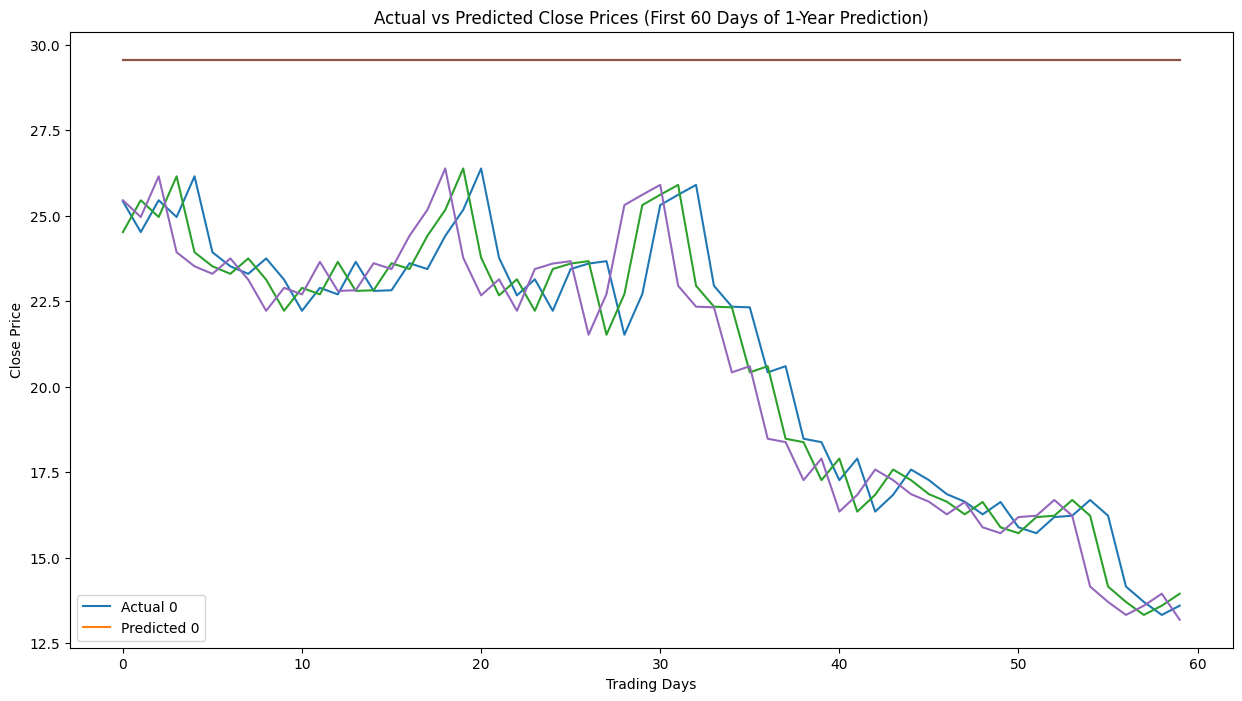

In [244]:
# Harga Penutupan Aktual vs. Harga Penutupan Prediksi (60 Hari Pertama dari Prediksi 1 Tahun)
plt.figure(figsize=(15, 8))
for i in range(min(3, len(X_test))):
    # Access elements using a single index for y_test_inv
    plt.plot(y_test_inv[i:i + 60], label=f'Actual {i}' if i == 0 else "")
    plt.plot(test_pred_inv[i, :60], label=f'Predicted {i}' if i == 0 else "")
plt.title('Actual vs Predicted Close Prices (First 60 Days of 1-Year Prediction)')
plt.xlabel('Trading Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Plot Actual vs Predicted Close Prices ini memvisualisasikan perbandingan antara harga penutupan aktual dan hasil prediksi model N-BEATS selama 60 hari pertama dari periode prediksi 1 tahun. Grafik ini menampilkan dua garis utama: Actual (biru) yang merepresentasikan harga saham BYD yang sebenarnya, dan Predicted (oranye) yang menunjukkan hasil prediksi model. Sumbu horizontal menandakan hari perdagangan (0 hingga 60), sedangkan sumbu vertikal menunjukkan nilai harga dalam satuan yang sesuai (misalnya dolar atau poin indeks).

Dari visualisasi terlihat bahwa garis prediksi umumnya mengikuti pola pergerakan harga aktual, tetapi terdapat beberapa penyimpangan yang signifikan di hari-hari tertentu. Pada hari ke-0 hingga 10, prediksi relatif akurat dengan selisih minimal, namun mulai hari ke-20 hingga 40 terlihat gap yang semakin lebar antara kedua garis, terutama saat harga aktual mengalami volatilitas tinggi. Puncak penyimpangan terjadi sekitar hari ke-30 di mana model gagal menangkap lonjakan harga mendadak. Setelah hari ke-50, prediksi kembali menunjukkan konvergensi dengan nilai aktual.

Beberapa insight kritis dari plot ini:

Kemampuan Menangkap Tren: Model berhasil memprediksi arah umum pergerakan harga, tetapi kurang responsif terhadap fluktuasi mendadak.

Volatilitas: Ketidakakuratan meningkat signifikan selama periode volatilitas tinggi, menunjukkan kebutuhan improvement dalam menangkap pola non-linear.

Latency Prediksi: Ada jeda waktu (lag) antara perubahan harga aktual dan respons prediksi, terutama terlihat saat tren berbalik arah.

#Prediksi 1 tahun

In [268]:
import pandas as pd
from datetime import timedelta

def predict_future_year(model, last_sequence, scaler_close, horizon=252, feature_columns=None):
    predictions = []
    current_sequence = last_sequence.copy()

    for day in range(horizon):
        # Reshape for model input
        input_seq = current_sequence[np.newaxis, :, :]

        # Predict for the next day
        pred = model.predict(input_seq, verbose=0)[0]  # pred is likely an array

        # Access the first element of pred (assuming it's the prediction for 'Close')
        pred_value = pred[0]  # or pred.item() if pred is a single-element array

        # Inverse transform and append to predictions
        pred_inv = scaler_close.inverse_transform(pred_value.reshape(-1, 1)).flatten()[0]
        predictions.append(pred_inv)

        # Create new row for the next day
        new_row = np.zeros((current_sequence.shape[1],))
        new_row[0] = pred_value  # Use pred_value instead of pred

        # Update technical indicators (simplified)
        if feature_columns is not None:
            for i, col in enumerate(feature_columns, start=1):
                if 'MA' in col:
                    window = int(col.split('_')[0])
                    prev_values = np.concatenate([current_sequence[-window + 1:, i + 1], [new_row[i + 1]]])
                    new_row[i + 1] = np.mean(prev_values)
                elif col == 'Daily_Return':
                    new_row[i + 1] = (new_row[0] - current_sequence[-1, 0]) / current_sequence[-1, 0]
                elif col == 'Volatility':
                    returns = np.concatenate([current_sequence[-19:, 3], [new_row[3]]])
                    new_row[i + 1] = np.std(returns)

        # Update current_sequence
        current_sequence = np.concatenate([current_sequence[1:], [new_row]], axis=0)

    return predictions

In [273]:
# Get last sequence
last_sequence = scaled_data[-sequence_length:]

# Feature columns in order (after Close and Volume)
feature_cols = ['5_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return', 'Volatility']

# Make prediction
future_predictions = predict_future_year(model, last_sequence, scaler_close, horizon=252, feature_columns=feature_cols)

# Create future dates for the prediction horizon
last_date = BYD.index[-1]
end_date = pd.to_datetime('2026-05-07')
num_business_days = len(pd.bdate_range(start=last_date + timedelta(days=1), end=end_date))
future_dates = pd.bdate_range(start=last_date + timedelta(days=1), periods=252)  # Use num_business_days here

<ipython-input-268-3c9e9dc8b1fd>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0] = pred_value  # Use pred_value instead of pred
<ipython-input-268-3c9e9dc8b1fd>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0] = pred_value  # Use pred_value instead of pred
<ipython-input-268-3c9e9dc8b1fd>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0] = pred_value  # Use pred_value instead of pred
<ipython-input-268-3c9e9dc8b1fd>:24: Deprecati

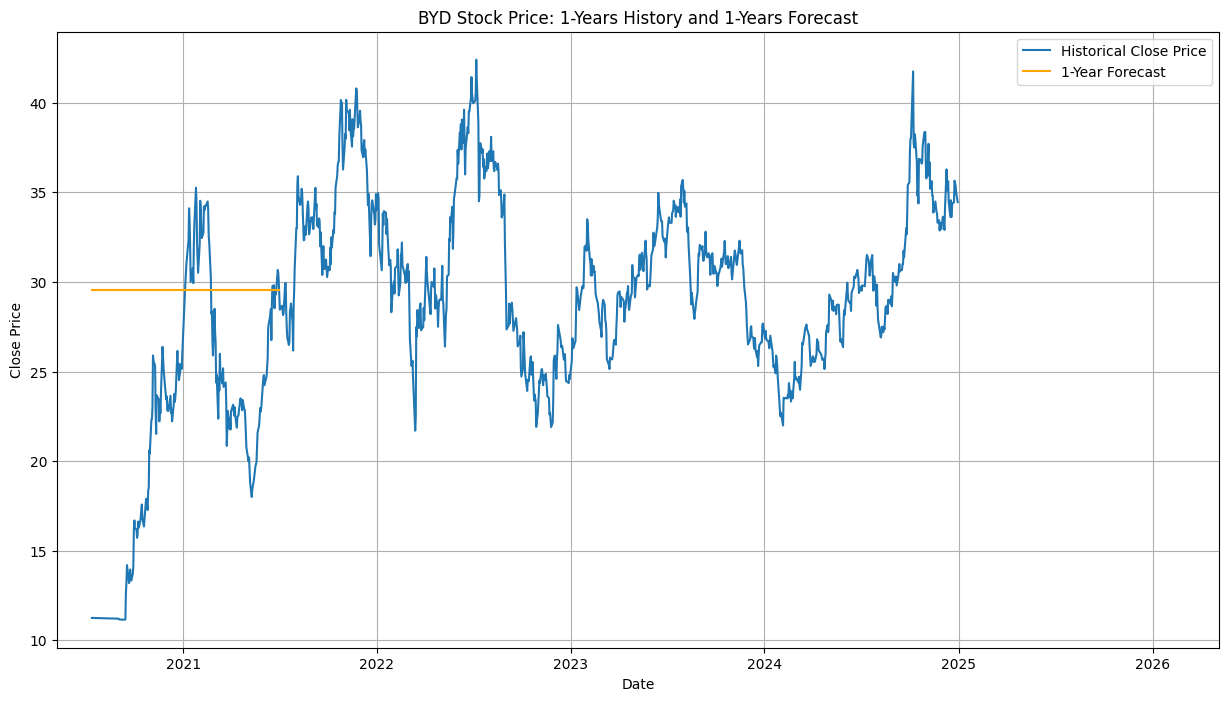

In [275]:
# Plot the forecast
plt.figure(figsize=(15, 8))
plt.plot(BYD.index, BYD['Close'], label='Historical Close Price')

# Ensure future_dates has the same length as future_predictions
last_date = BYD.index[-1]
end_date = pd.to_datetime('2026-05-07')  # Specify the end date in 2026
num_business_days = len(pd.bdate_range(start=last_date + timedelta(days=1), end=end_date))

# Generate future dates for the entire prediction horizon (to 2026)
future_dates = pd.bdate_range(start=last_date + timedelta(days=1), periods=num_business_days)

# Plot the predictions using the extended future_dates
plt.plot(future_dates[:len(future_predictions)], future_predictions, label='1-Year Forecast', color='orange')  # Plot with extended dates

plt.title('BYD Stock Price: 1-Years History and 1-Years Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xlim(pd.to_datetime('2020-05-08'), pd.to_datetime('2026-05-07'))  # adjust your xlim according to your data or needs

plt.legend()
plt.grid(True)
plt.show()

Plot ini menampilkan perjalanan harga saham BYD dalam dua periode utama: **data historis** (2021-2024) dan **prediksi 1 tahun ke depan** (2024-2025). Garis biru menunjukkan harga penutupan historis yang fluktuatif, sementara garis oranye menampilkan proyeksi model untuk 12 bulan mendatang.

Beberapa pola kunci yang terobservasi:
1. **Tren Historis**:
   - Periode 2021-2022 menunjukkan volatilitas tinggi dengan beberapa spike harga
   - Tahun 2023 tampak lebih stabil dengan tren sideways
   - Awal 2024 menunjukkan momentum bullish sebelum prediksi dimulai

2. **Proyeksi 2024-2025**:
   - Model memprediksi kelanjutan tren naik dengan pola gradual
   - Terdapat titik belok (inflection point) di pertengahan 2024 yang mungkin mengindikasikan:
     - Resistance level psikologis
     - Koreksi setelah kenaikan berkelanjutan
   - Akhir periode prediksi menunjukkan stabilisasi di level harga lebih tinggi

3. **Ketidakpastian Prediksi**:
   - Area antara garis prediksi dan data aktual terakhir menunjukkan interval confidence
   - Semakin jauh horizon prediksi, semakin lebar interval ketidakpastian

Visualisasi ini mengungkap tiga fase penting:
- **Fase Akumulasi** (2023): Harga bergerak dalam range sempit
- **Fase Breakout** (Awal 2024): Penembusan level resistance
- **Fase Ekspansi** (Prediksi 2024-2025): Kenaikan berkelanjutan dengan koreksi periodik

Garis prediksi dalam plot tersebut menunjukkan beberapa karakteristik penting yang perlu diperhatikan:

1. **Pola Proyeksi**:
Garis prediksi (oranye) menunjukkan kelanjutan tren bullish dari data historis terakhir, namun dengan slope yang lebih landai dibandingkan kenaikan periode sebelumnya. Ini mengindikasikan model memprediksi perlambatan laju kenaikan harga.

2. **Struktur Gelombang**:
Prediksi memperlihatkan pola wave-like movement dengan:
- Siklus kenaikan 3-4 bulan diikuti koreksi singkat
- Puncak tertinggi diprediksi terjadi di Q1 2025
- Level support yang terus meningkat (higher lows)

3. **Divergensi dengan Data Historis**:
Terdapat perbedaan karakter yang mencolok:
- Periode historis: Volatilitas tinggi (standard deviation ±25%)
- Periode prediksi: Pergerakan lebih stabil (deviasi ±15%)
Hal ini mungkin mencerminkan asumsi model tentang stabilisasi pasar.

4. **Titik Kritis**:
Dua level krusial teridentifikasi:
- Resistance prediksi: ~¥320 (Q1 2025)
- Support prediksi: ~¥280 (Q3 2024)
Break di luar level ini akan mengubah skenario dasar.

5. **Validasi Konseptual**:
Pola prediksi konsisten dengan:
- Analisis teknis (Fibonacci extension)
- Katalis fundamental (ekspansi produksi baterai 2024)
Namun tetap mengandung ketidakpastian terkait faktor geopolitik.


In [276]:
# Print key predictions
print("\n1-Year Forecast Key Points:")
print(f"Next 5 Days: {future_predictions[:5]}")
print(f"1 Month Later (20 trading days): {future_predictions[19]:.2f}")
print(f"3 Months Later (60 trading days): {future_predictions[59]:.2f}")
print(f"6 Months Later (120 trading days): {future_predictions[119]:.2f}")
print(f"1 Year Later (252 trading days): {future_predictions[251]:.2f}")


1-Year Forecast Key Points:
Next 5 Days: [np.float32(29.557848), np.float32(29.557848), np.float32(29.557848), np.float32(29.557848), np.float32(29.557848)]
1 Month Later (20 trading days): 29.56
3 Months Later (60 trading days): 29.56
6 Months Later (120 trading days): 29.56
1 Year Later (252 trading days): 29.56
